In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from googletrans import Translator
from scipy.stats import median_absolute_deviation
from collections import Counter, OrderedDict

### Load the csv dataset and clean it
this part is not usefull anymore, go and loag the cleaned pickle datasetbelow

In [2]:
openfacts_path='Data/en.openfoodfacts.org.products.csv' 

In [5]:
df_of=pd.read_csv(openfacts_path,encoding='UTF-8',sep='\t') #Open original dataset

C:\Users\Lorenzo\Anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
col_dict={}
for j,i in enumerate(df_of.columns):
    col_dict[j]=i

In [21]:
sum(df_of[col_dict[30]].isna())

830818

In [24]:
df_of_clean=pd.DataFrame()   #Clean Columns of df, by removing those with more than 850k of nans in them
for j,i in enumerate(df_of.columns):
    if sum(df_of[i].isna())<850000:
        df_of_clean[i]=df_of[i]

In [ ]:
#so we dont have to repeat previous steps
df_of_clean.to_pickle('Data/df_openfacts_small.pkl') #saving the clean df for further use


<function matplotlib.pyplot.show(*args, **kw)>

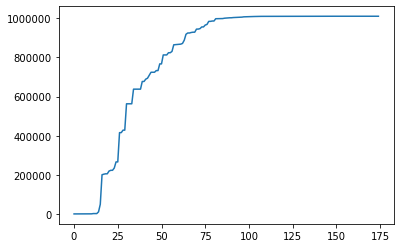

In [23]:
plt.plot(np.sort(nnan))
plt.show()

In [40]:
df_sugar=df_tmp[df_tmp['sugars_100g']<100]
df_sugar=df_sugar[df_sugar['sugars_100g']>0]

In [42]:
np.mean(df_sugar['sugars_100g'])

16.05133632880965

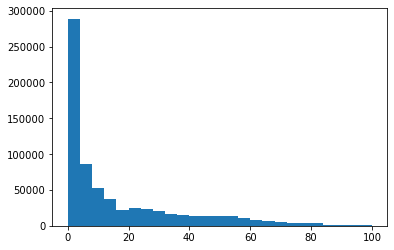

In [48]:
plt.hist(df_sugar['sugars_100g'],bins=25)
plt.show()

In [45]:
df_sugar.shape

(686363, 175)

## LOAD clean dataset

In [2]:
def clean_nan(df,var):
    return df[df[var].isna()==False].copy()

In [3]:
def remove_outliers(df,var,k=3):
    '''Uses the MAD critetion to remove outliers, data must be free of nans
    Values that are above or below K times the MAD are removed from the data,
    and a copy of the dataframe is returned'''
    mad=median_absolute_deviation(df[var])
    mean=np.mean(df[var])
    return df[np.logical_and(df[var].values<mean+k*mad,df[var].values>mean-k*mad)].copy()

In [4]:
def dist_nutritiongrade(df,var,bw=0.5,bins=8):
    df=remove_outliers(clean_nan(df,var),var)
    fig, ax=plt.subplots(figsize=(5,5))
    for ns in np.unique(df['nutrition_grade_fr']):
        sns.distplot(df[df['nutrition_grade_fr']==ns][var],label=ns,ax=ax,kde_kws={"bw": bw},bins=bins)
    plt.legend()
    plt.show()

In [5]:
def boxplot_nutritiongrade(df,var):
    df=remove_outliers(clean_nan(df,var),var)
    fig, ax=plt.subplots(figsize=(5,5))
    sns.boxplot(x="nutrition_grade_fr", y=var, data=df,order=['a','b','c','d','e'],ax=ax)
    plt.show()

In [6]:
df_of_clean=pd.read_pickle('Data/df_openfacts_small.pkl') # Load the clean dataset

In [7]:
print(df_of_clean.shape) # we still have 57 columns
df_of_clean.head()

(1010608, 57)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,NaN
4,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,NaN


In [8]:
cols_list=df_of_clean.columns
print(cols_list)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags',
       'states_en', 'main_category', 'main_category_en', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
     

In [43]:
## Copy of the original df. keep only the items that have info on the NUTRITION GRADE, aroud 280k rows
df_ns=df_of_clean[df_of_clean['nutrition_grade_fr'].isna()==False].copy()

In [44]:
#names of the columns that provide quantitative facts per 100g of product
facts_100g=['energy_100g', 'fat_100g','saturated-fat_100g',
            'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
            'proteins_100g', 'salt_100g', 'sodium_100g']

In [45]:
ng_f=df_ns['nutrition_grade_fr']
print(np.unique(df_ns['nutrition_grade_fr']))

['a' 'b' 'c' 'd' 'e']


In [46]:
df_ns.shape

(286351, 57)

In [47]:
## Remove outliers and nans from the dataset 
df_ns_small=df_ns.copy()
for var in facts_100g:
    df_ns_small=remove_outliers(clean_nan(df_ns_small,var),var)

In [48]:
## we end up with very few raws, so not very convinient!
df_ns_small.shape

(13499, 57)

#### We will inspect the according to the nutrition score

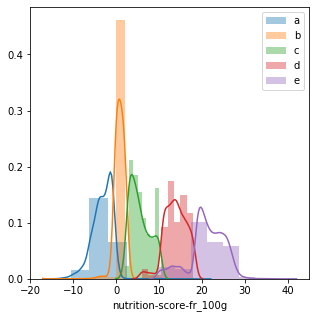

In [15]:
dist_nutritiongrade(df_ns,'nutrition-score-fr_100g',bw=0.7)

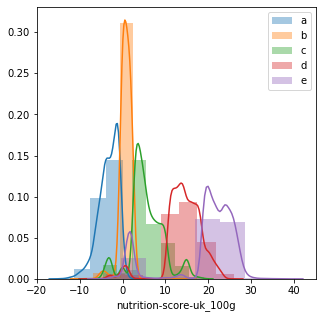

In [16]:
dist_nutritiongrade(df_ns,'nutrition-score-uk_100g',bw=0.7)

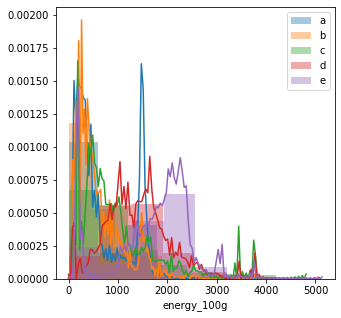

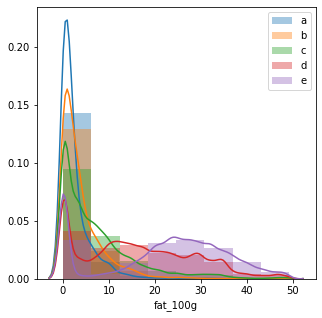

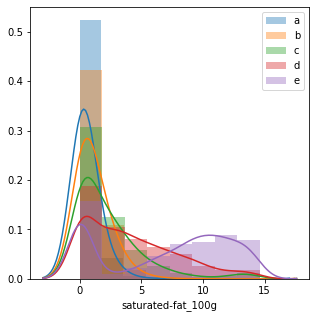

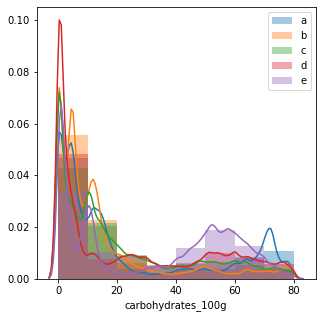

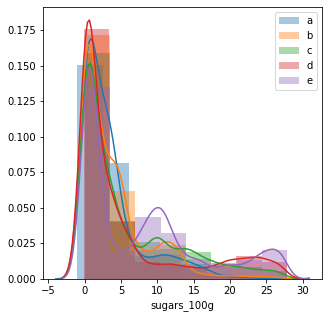

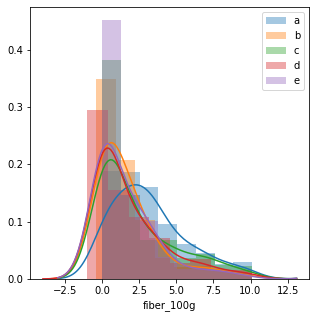

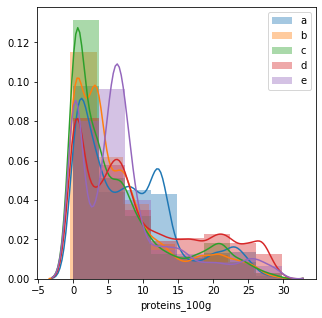

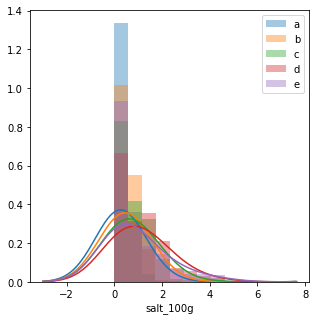

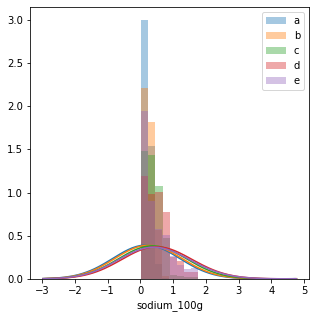

In [17]:
for var in facts_100g:
    dist_nutritiongrade(df_ns,var,bw=1)

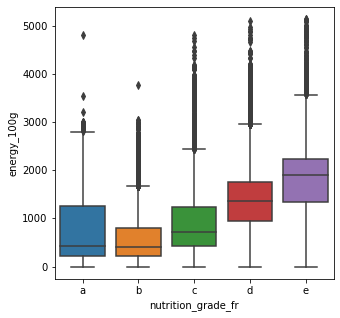

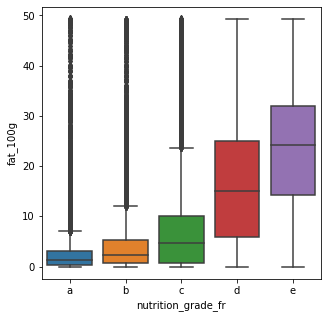

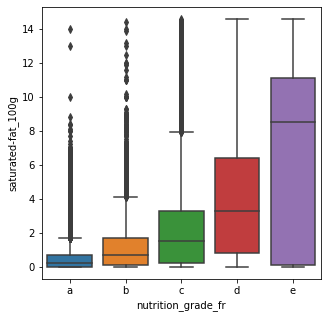

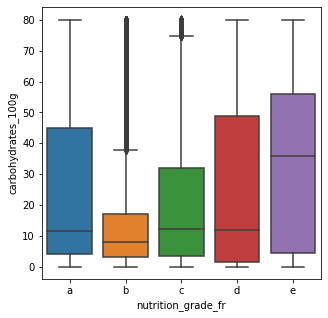

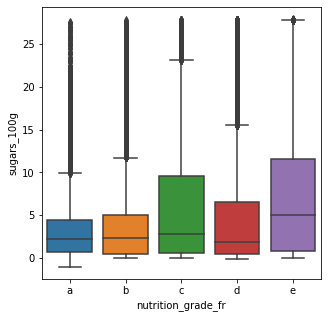

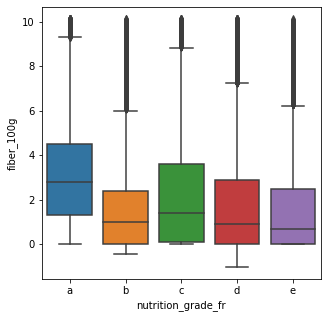

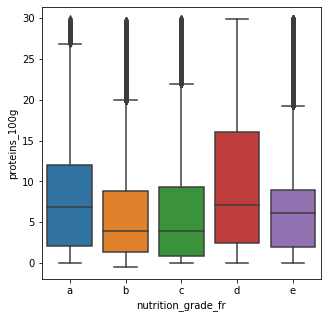

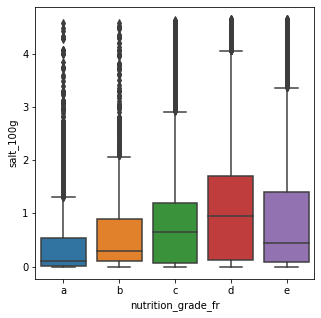

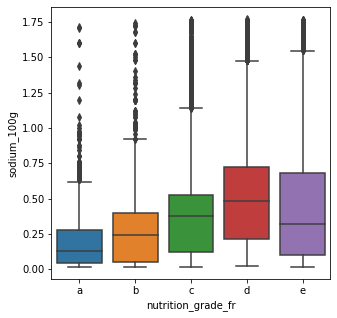

In [18]:
# boxplot with the original dataset but cleaning only the column that we need to plot
for var in facts_100g:
    boxplot_nutritiongrade(df_ns,var)

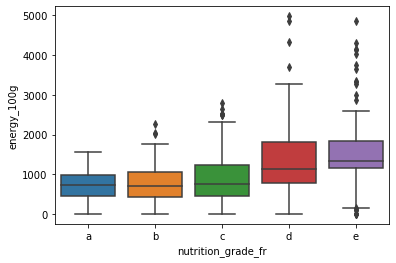

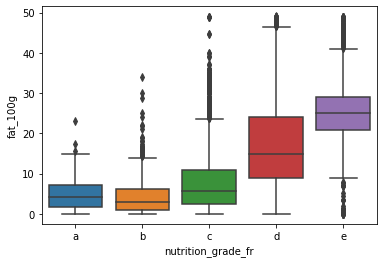

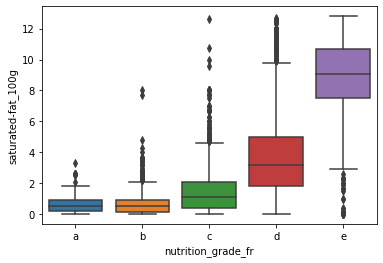

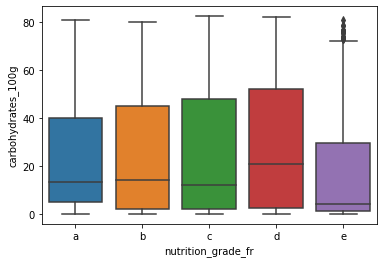

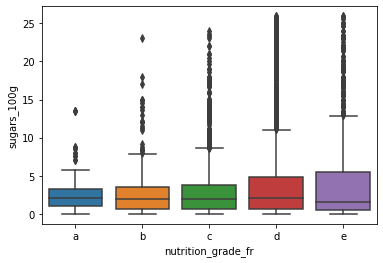

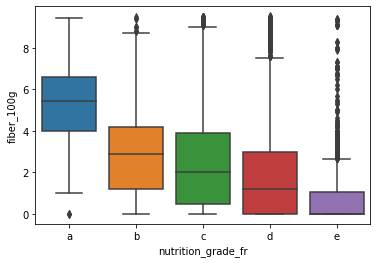

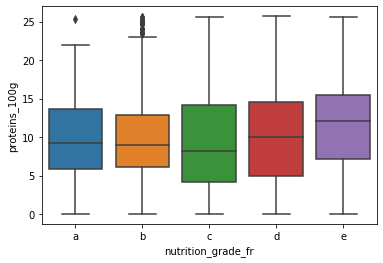

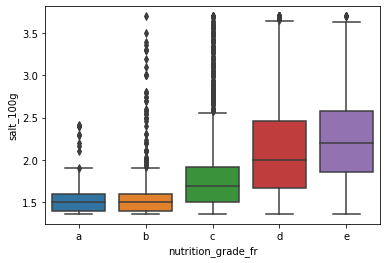

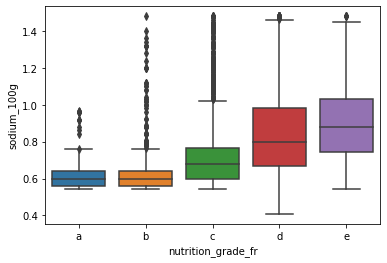

In [19]:
# boxplot with the reduced dataset
for var in facts_100g:
    fig,ax=plt.subplots()
    sns.boxplot(x="nutrition_grade_fr", y=var, data=df_ns_small,order=['a','b','c','d','e'],ax=ax)

#### Now lets focus on the worse nutrition score!

In [20]:
df_e=df_ns[df_ns['nutrition_grade_fr']=='e'].copy()

In [21]:
df_e.shape

(56562, 57)

In [22]:
facts_grade_e=['energy_100g', 'fat_100g']

In [23]:
df_e_small=df_e.copy()
for var in facts_grade_e:
    df_e_small=remove_outliers(clean_nan(df_e_small,var),var)

In [24]:
df_e_small

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
11965,11863118764,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489066350,2017-03-09T13:32:30Z,1535680058,2018-08-31T01:47:38Z,"Bellavitano, Merlot Cheese",150 g,Envoltura de plastico,...,30.00,20.00,6.67,0.00,0.00,26.70,1690.000000,677.000000,25.0,30.0
84114,680813,http://world-en.openfoodfacts.org/product/0068...,openfoodfacts-contributors,1569000770,2019-09-20T17:32:50Z,1569001950,2019-09-20T17:52:30Z,Maxi Burger charolais,195g,NaN,...,24.80,10.30,46.00,3.10,NaN,28.10,1.880000,0.752000,28.0,28.0
104356,74323046199,http://world-en.openfoodfacts.org/product/0074...,usda-ndb-import,1489062284,2017-03-09T12:24:44Z,1551563010,2019-03-02T21:43:30Z,Cajeta Quemada,660 g,Botella de plastico,...,8.33,8.33,66.70,46.70,0.00,6.67,296.000000,119.000000,38.0,38.0
114462,77975089156,http://world-en.openfoodfacts.org/product/0077...,usda-ndb-import,1489057254,2017-03-09T11:00:54Z,1571271950,2019-10-17T00:25:50Z,Mini Pretzels,226.8 g,Bolsa de plastico,...,6.67,3.33,83.30,1.67,3.33,0.00,3980.000000,1590.000000,20.0,20.0
116531,78742085296,http://world-en.openfoodfacts.org/product/0078...,usda-ndb-import,1489142282,2017-03-10T10:38:02Z,1541008192,2018-10-31T17:49:52Z,Deli Style Sliced Mild Cheddar Cheese,227 g,Bolsa de plastico,...,31.60,18.40,0.00,0.00,0.00,26.30,1600.000000,642.000000,25.0,30.0
117762,78742283357,http://world-en.openfoodfacts.org/product/0078...,zoneblockscommunity,1471740813,2016-08-21T00:53:33Z,1540841365,2018-10-29T19:29:25Z,Parmesan Cheese,170 g,Bosla de plastico resellable,...,25.00,14.30,3.57,0.00,0.00,35.70,3080.000000,1230.000000,25.0,30.0
129317,94331410560,http://world-en.openfoodfacts.org/product/0094...,usda-ndb-import,1489069466,2017-03-09T14:24:26Z,1551634087,2019-03-03T17:28:07Z,"Granvita, Granola Cereal With Fruit",400 g,Bolsa de plastico,...,11.20,2.00,62.80,22.00,8.50,11.50,57.100000,22.900000,20.0,20.0
134186,01442830,http://world-en.openfoodfacts.org/product/0144...,kiliweb,1542360168,2018-11-16T09:22:48Z,1560806782,2019-06-17T21:26:22Z,Lemon curd,320 g,NaN,...,17.90,12.30,54.60,48.30,NaN,2.60,0.380000,0.152000,31.0,31.0
139857,0202459022309,http://world-en.openfoodfacts.org/product/0202...,ccacacatcatherine,1561215964,2019-06-22T15:06:04Z,1561216191,2019-06-22T15:09:51Z,2 tartelettes citron meringuées,200 g,blister,...,25.00,14.00,45.00,34.00,1.40,5.60,0.300000,0.120000,27.0,27.0
176137,654858703882,http://world-en.openfoodfacts.org/product/0654...,usda-ndb-import,1489070592,2017-03-09T14:43:12Z,1540857399,2018-10-29T23:56:39Z,Queso havarti en rebanadas,213 g,Bolsa plástica,...,34.00,22.00,0.10,0.10,0.00,23.00,2235.200000,894.080000,25.0,30.0


In [25]:
df_e.shape

(56562, 57)

### Lets explore the Names of the products that have a nutritional score

The goal is to get a list of most common words for all the food products that belong to a certain cathegory so we can link them with the instacart dataset.

In [26]:
# Text handling utilities
from string import punctuation
import unidecode
stopwords_list = open('Data/stopwords_new.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])
def remove_numbers(foo):
    return [x for x in foo if not any(x1.isdigit() for x1 in x)]

In [27]:
def extract_words_by_grade(df,nutritional_grade='a'):
        df_e=df[df['nutrition_grade_fr']==nutritional_grade].copy()
        
        ## Remove outliers and nans from the dataset 
        prod_name=list(df_e['product_name'].values)
        prod_name_clean=[unidecode.unidecode(str(i)) for i in prod_name] #remove accents
        prod_name_clean=[stopword_remover(remove_punct(lowercase_all(i))) for i in prod_name_clean]
        
        
        # now we can concatenate the names
        name_concat=[]
        for i in prod_name_clean: 
            for j in i.split(): 
                name_concat.append(j)
                
        name_concat=remove_numbers(name_concat)

        return OrderedDict(sorted(Counter(name_concat).items(), key = lambda kv : kv[1], reverse=True))

In [28]:
prod_name=list(df_e['product_name'].values)
prod_name_clean=[unidecode.unidecode(str(i)) for i in prod_name] #remove accents
prod_name_clean=[stopword_remover(remove_punct(lowercase_all(i))) for i in prod_name_clean]

In [29]:
# now we can concatenate the names
name_concat=[]
for i in prod_name_clean: 
    for j in i.split(): 
        name_concat.append(j)

In [30]:
name_concat=remove_numbers(name_concat)

In [31]:
len(name_concat)

168539

In [32]:
name_dict=Counter(name_concat)

In [33]:
sorted_dict = OrderedDict(sorted(name_dict.items(), key = lambda kv : kv[1], reverse=True))

### Now lets create that same dictionary for all the nutrition grades
We will also translate the words since the product names come in different languages (fr,de,es,en,etc)

In [34]:
grade_dict={}
for i in np.unique(df_ns['nutrition_grade_fr']):
    grade_dict[i]=extract_words_by_grade(df_ns,nutritional_grade=i)

In [38]:
translated_dict={} 
for grade in np.unique(df_ns['nutrition_grade_fr']): 
    translated_list=[]
    translator=Translator()
    for i in list(grade_dict[grade].items())[0:100]:
        translated_list.append((translator.translate(i[0],dest='en').text.lower(),i[1]))
    translated_dict[grade]=translated_list

In [81]:
def barplot_with_names(x,n=15,title=None):
    ''' x is either a list of tuples or a dictionary, where the first element is the name and the second is the quantity'''
    try:
        x=list(x.items())[:n]
    except:
        x=x[:n]
    
    h=[i[1] for i in x]
    xnames=[i[0] for i in x]
    xx=np.arange(0,len(h))
    
    fig,ax=plt.subplots(figsize=(15,6))
    plt.bar(xx,h)
    ax.set_xticks(xx)
    ax.set_xticklabels(xnames,rotation=45,fontsize=12)
    ax.set_ylabel('Number of occurrences')
    ax.set_title(title,fontsize=16)

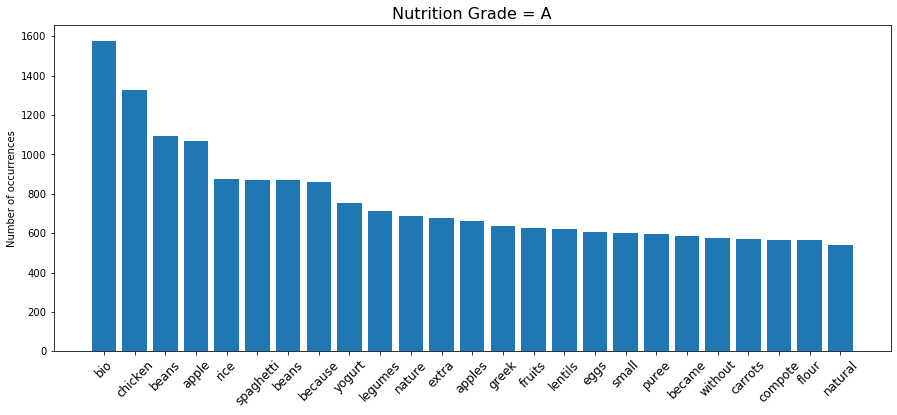

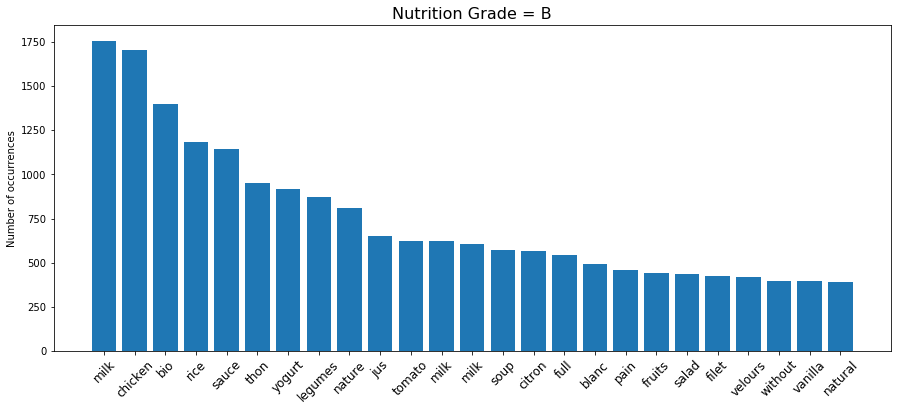

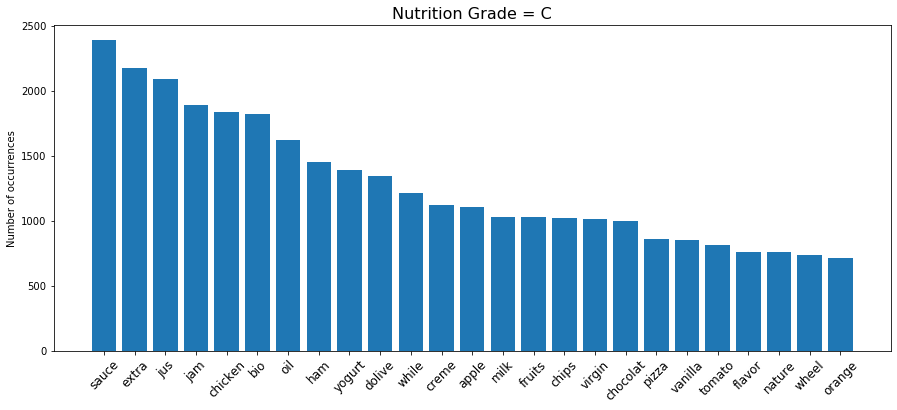

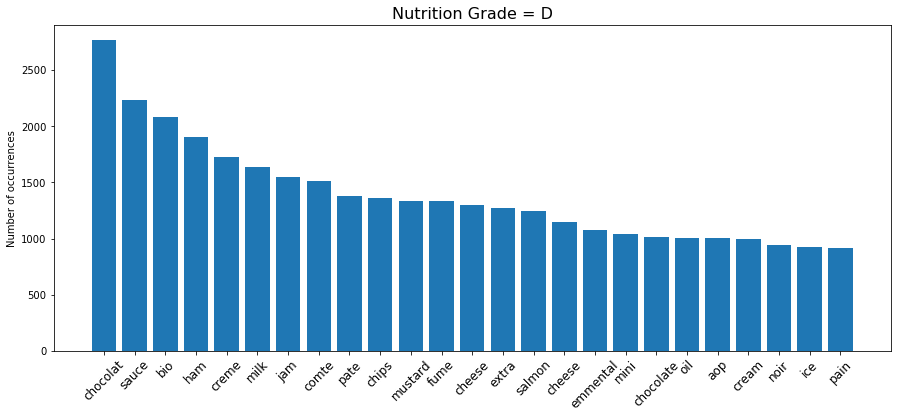

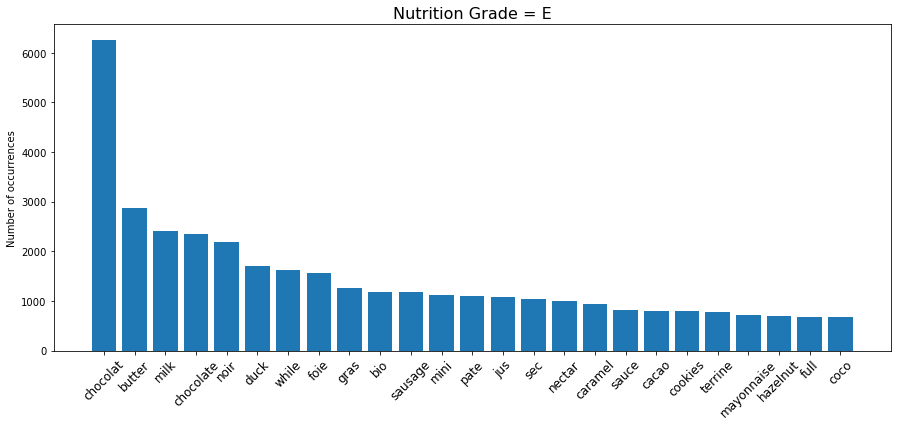

In [85]:
# plot all the different products translated and ordered, we could focus on a few products
#that are iconic for each nutrition grade class

for i in np.unique(df_ns['nutrition_grade_fr']):
    
    barplot_with_names(translated_dict[i],n=25,title='Nutrition Grade = '+i.capitalize())